# Vanilla neural networks

### Motivation

Let's say you want to build a model that, given an image with a handwritten digit, you want it to **classify that digit**, *with a decent accuracy*. One of the most popular ways to do this is to use a **Vanilla neural network**. Let's dive in!

### Structure of a neural network

![Neural network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png)

A neural network is a collection of *neurons* with *synapses* connecting them(think of it like a graph). The collection is organized in 3 big parts, each with their respective sizes:

In [1]:
import pandas as pd
data = [['Input', '(InputSize, HiddenSize)'], ['Hidden', '(HiddenSize, OutputSize)'], ['Output', '(OutputSize, NumberOfClasses)']]
pd.DataFrame(data, columns=['Layer type', 'Size(in, out)'])

,Layer type,"Size(in, out)"
0,Input,"(InputSize, HiddenSize)"
1,Hidden,"(HiddenSize, OutputSize)"
2,Output,"(OutputSize, NumberOfClasses)"


##### Please note that there can be as many hidden layers as you want. In the example above I only used 1 layer. "Deep" learning implies multiple hidden layers.

Moving forward, we will see how to *train* our neural network and how to get a prediction out of it. First, some notation:

In [2]:
import pandas as pd
data = [['X', 'Input vector'], ['y', 'Output vector']]
pd.DataFrame(data, columns=['Name', 'Definition'])

,Name,Definition
0,X,Input vector
1,y,Output vector


So, our neural network takes as input a vector. How do we get this vector? We will use the MNIST dataset, which contains 70.000 28x28 images of handwritten digits.

### Training the neural network

The usual pipeline sounds like this:
-  Grab the dataset
-  Split it into training and testing batches
-  Perform forward/backward propagation on the training set, while minimizing a loss function
-  Test your accuracy on the testing batch

#### Grabbing the dataset

Our implementation will be made using the PyTorch library - easy to use for begginers and also used by veterans. It already contains dataset loaders that will make our life easier.

In [5]:
# A few imports
from torchvision.datasets import MNIST
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

train_data = MNIST(root='./data', 
                   train=True, 
                   transform=torchvision.transforms.ToTensor(), 
                   download = True)

test_data = MNIST(root='./data', 
                  train=False, 
                  transform=torchvision.transforms.ToTensor(), 
                  download=True)

Processing...
Done!


Train data size: torch.Size([60000, 28, 28]), 
Labels: torch.Size([60000])
########################################
Test data size: torch.Size([10000, 28, 28]), 
Labels: torch.Size([10000, 28, 28])


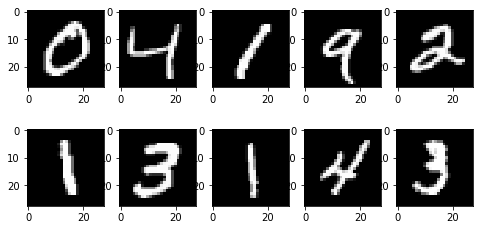

In [26]:
# Take a look at the data
print(f"Train data size: {train_data.train_data.size()}, \nLabels: {train_data.train_labels.size()}")
print('#' * 40)
print(f"Test data size: {test_data.test_data.size()}, \nLabels: {test_data.test_data.size()}")

# Plot some examples from the training set
w = 10
h = 10
fig = plt.figure(figsize=(8,4))
columns = 5
rows = 2
for i in range(1, columns*rows + 1):
    img = train_data.train_data[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

#### Network topology

Our input will be fed to the neural network by breaking the (28, 28) matrix that forms the image into a (28x28, 1) vector. 

The neural network topology that we will use is the following:
-  Input = 784 -> Hidden1 = 128
-  Hidden1 -> ReLU
-  Hidden1 = 128 -> Output = 10(number of classes)

#### Training the network

Training the neural networks takes place in two big parts:
-  Forward propagation
-  Backward propagation

##### Algorithm

-  *1)* Initialize all the weights in the network with random numbers from a normal Gaussian distribution
-  *2)* Give an input and propagate it all the way to the output
-  *3)* Calculate the loss, with the loss function of your choice
-  *4)* Calculate the gradient of the loss function with respect to each weight in the net
-  *5)* Optimize the weights with a gradient descent step

In [50]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.relu = nn.ReLU()
        self.out = nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.out(x)
        return x
        
        

In [51]:
model = Net(28*28, 128, 10)

In [52]:
model

Net(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=128, out_features=10, bias=True)
)

In [53]:
from torch.optim import SGD # The optimizer

In [54]:
opt_SGD = SGD(model.parameters(), lr = 0.001) #lr = learning rate

In [55]:
criterion = nn.CrossEntropyLoss() # Loss function

In [56]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=100,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                           batch_size=100,
                                           shuffle = False)

In [61]:
from torch.autograd import Variable

num_epochs = 20
batch_size = 100
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Convert tensors to variables
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        opt_SGD.zero_grad() # Zero out all gradients

        # Calculate the output
        outputs = model(images)

        # Calculate the loss function based on the output and the truth
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the weights
        opt_SGD.step()

        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                     %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data[0]))

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/20], Step [100/600], Loss: 2.2509
Epoch [1/20], Step [200/600], Loss: 2.2324
Epoch [1/20], Step [300/600], Loss: 2.1879
Epoch [1/20], Step [400/600], Loss: 2.1935
Epoch [1/20], Step [500/600], Loss: 2.1645
Epoch [1/20], Step [600/600], Loss: 2.1477
Epoch [2/20], Step [100/600], Loss: 2.1086
Epoch [2/20], Step [200/600], Loss: 2.0719
Epoch [2/20], Step [300/600], Loss: 2.0946
Epoch [2/20], Step [400/600], Loss: 2.0519
Epoch [2/20], Step [500/600], Loss: 2.0243
Epoch [2/20], Step [600/600], Loss: 1.9864
Epoch [3/20], Step [100/600], Loss: 1.9710
Epoch [3/20], Step [200/600], Loss: 1.9343
Epoch [3/20], Step [300/600], Loss: 1.9396
Epoch [3/20], Step [400/600], Loss: 1.8458
Epoch [3/20], Step [500/600], Loss: 1.8581
Epoch [3/20], Step [600/600], Loss: 1.7885
Epoch [4/20], Step [100/600], Loss: 1.7504
Epoch [4/20], Step [200/600], Loss: 1.6931
Epoch [4/20], Step [300/600], Loss: 1.7593
Epoch [4/20], Step [400/600], Loss: 1.6767
Epoch [4/20], Step [500/600], Loss: 1.6977
Epoch [4/20

In [63]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels).sum()     # Increment the correct count
    
print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 87 %


In [64]:
# To save the trained model:
torch.save(model.state_dict(), 'model.pkl')

### Problems with vanilla DNNs

The problem with vanilla DNNs is that they don't scale well with the size of the picture. In order to take as input a 28x28 picture, we had to keep in memory and train a bunch of weights, even for a very basic topology! Now imagine going up in size with a 1920x1080 picture or something along these lines. From 28x28 = 784 we go to 1920x1080 = 2073600. It's simply not doable.

## Convolutional neural networks

3D volumes of neurons. Convolutional Neural Networks take advantage of the fact that the input consists of images and they constrain the architecture in a more sensible way. In particular, unlike a regular Neural Network, the layers of a ConvNet have neurons arranged in 3 dimensions: width, height, depth. (Note that the word depth here refers to the third dimension of an activation volume, not to the depth of a full Neural Network, which can refer to the total number of layers in a network.)

![CNN](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

![CNN2](http://cs231n.github.io/assets/cnn/cnn.jpeg)

A simple ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture.

This is an example on what the CNNs learn:

![CNNLayers](http://cs231n.github.io/assets/cnn/weights.jpeg)

![ASD](http://cs231n.github.io/assets/cnn/convnet.jpeg)

Code example:

In [4]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 120)
        self.fc1_drop = nn.Dropout()
        self.fc2 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1_drop(self.fc1(x)))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x)
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
optimizer = optim.Adam(net.parameters())
def train(epoch):
    net.train()
    for batch_index, (inputs, labels) in enumerate(trainloader):
        inputs, labels = Variable(inputs), Variable(torch.squeeze(labels))
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = F.nll_loss(outputs, labels)
        loss.backward()
        optimizer.step()
        if batch_index % 400 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_index * len(inputs), len(trainloader.dataset),
                    100. * batch_index / len(trainloader), loss.data[0]))
for epoch in range(4): # loop over the dataset multiple times
    train(epoch)

NameError: name 'trainloader' is not defined